At this point, you have obtained the data set for your Capstone project, cleaned and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you have learned to explore the data. For example, are there variables that are particularly significant in terms of explaining the answer to your project question? Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? 

**Submission:** Write a short report (1-2 pages) on the inferential statistics steps you performed and your findings. Check this report into your github and submit a link to it. Eventually, this report can be incorporated into your Milestone report.

# Load data

In [6]:
# handling data
import numpy as np
import pandas as pd

# visualizations
import matplotlib.pyplot as plt
%matplotlib inline

from plotnine import (aes, coord_flip, geom_boxplot, geom_abline,
                      geom_histogram, geom_point, geom_text, geom_tile,
                      ggplot, element_text, facet_grid, stat_bin,
                      theme_bw, theme)
import seaborn as sns

In [2]:
# Load tidied dataframes

# spells_df = pd.read_pickle('data/spells_df')
monster_df = pd.read_pickle('data/monster_df')
# actions_df = pd.read_pickle('data/actions_df')
# spellbook_df = pd.read_pickle('data/spellbook_df')
# innate_spellbook_df = pd.read_pickle('data/innate_spellbook_df')
# special_abilities_df = pd.read_pickle('data/special_abilities_df')
# condition_immunities_df = pd.read_pickle('data/condition_immunities_df')
# damage_immunities_df = pd.read_pickle('data/damage_immunities_df')
# damage_resistances_df = pd.read_pickle('data/damage_resistances_df')
# damage_vulnerabilities_df = pd.read_pickle('data/damage_vulnerabilities_df')

In [3]:
subset = ['challenge_rating', 'armor_class', 'hit_points', 'strength',
          'dexterity', 'constitution', 'intelligence', 'wisdom', 'charisma']

In [7]:
monster_df[subset].corr()['challenge_rating']

challenge_rating    1.000000
armor_class         0.759011
hit_points          0.941061
strength            0.722490
dexterity          -0.023984
constitution        0.859834
intelligence        0.642374
wisdom              0.549235
charisma            0.692209
Name: challenge_rating, dtype: float64

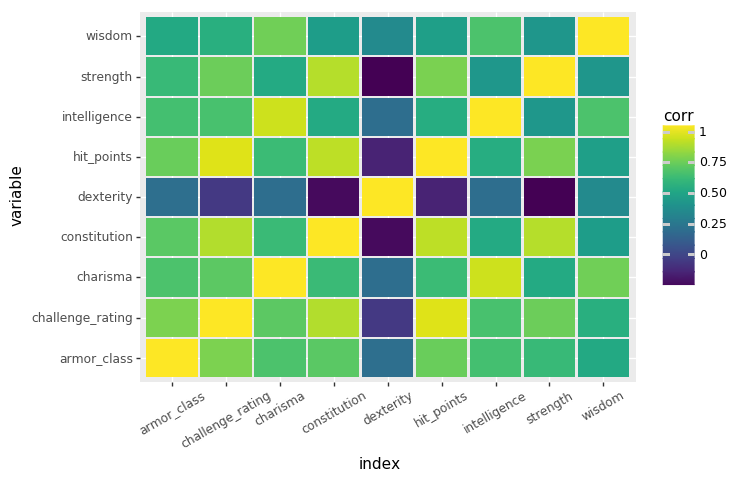

<ggplot: (280749758)>

In [8]:
ggplot(pd.melt(monster_df[subset].corr().reset_index(),
               id_vars=['index'],
               value_name='corr'),
       aes('index', 'variable', fill='corr')) \
    + geom_tile(aes(width=.95, height=.95)) \
    + theme(axis_text_x=element_text(angle=30))

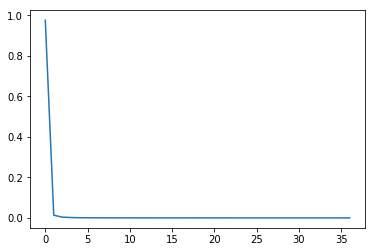

In [9]:
from sklearn.decomposition import PCA
pca = PCA()

X = monster_df.select_dtypes(include=['float64', 'int64'])
pca.fit(X)
plt.plot(pca.explained_variance_ratio_);

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
y = monster_df.challenge_rating
X = monster_df[['hit_points', 'armor_class']]
lr.fit(X, y)
print('coefficent of determination: {:.2f}'.format(lr.score(X, y)))

coefficent of determination: 0.90


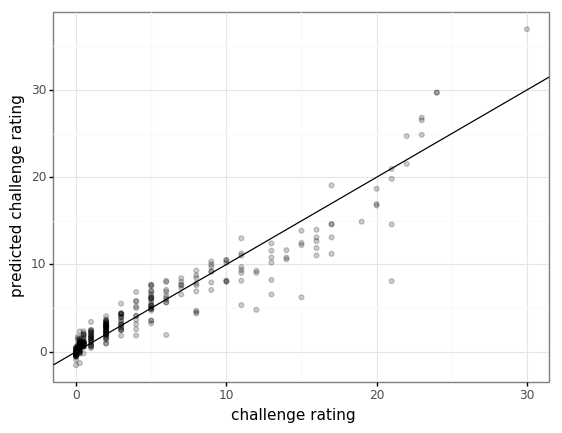

<ggplot: (-9223372036570323894)>

In [12]:
pred = pd.DataFrame({'challenge rating': y,
                     'predicted challenge rating': lr.predict(X)})
ggplot(pred, aes(x='challenge rating', y='predicted challenge rating')) \
    + geom_point(alpha=0.2) \
    + geom_abline(intercept = 0, slope = 1) \
    + theme_bw()

In [13]:
# and if we consider all numerical factors?

y = monster_df.challenge_rating
X = monster_df.select_dtypes(include=['float64', 'int64']).copy()
X = X.drop('challenge_rating', axis=1)

lr.fit(X, y)
print('coefficent of determination: {:.2f}'.format(lr.score(X, y)))

coefficent of determination: 0.95


In [14]:
pred['delta'] = pred['challenge rating'] - pred['predicted challenge rating']
mean, std_dev = pred.delta.mean(), pred.delta.std()

mask = (pred.delta > mean + 1.7 * std_dev) | (pred.delta < mean - 1.7 * std_dev)
pred[mask].sort_values('delta', ascending=False).head()

,challenge rating,predicted challenge rating,delta
name,,,
Lich,21.0,8.094490,12.905510
Mummy Lord,15.0,6.239372,8.760628
Archmage,12.0,4.803713,7.196287
Rakshasa,13.0,6.567358,6.432642
Solar,21.0,14.593570,6.406430
